<a href="https://colab.research.google.com/github/Aindri11/Machine-Learning-Lab/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 128  # 128 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [17]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [18]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [22]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')

In [23]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [24]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [25]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2325 - val_loss: 0.1699
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.1523 - val_loss: 0.1360
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1278 - val_loss: 0.1178
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1128 - val_loss: 0.1057
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1025 - val_loss: 0.0973
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0957 - val_loss: 0.0919
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0911 - val_loss: 0.0881
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0878 - val_loss: 0.0854
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0854 - val_loss: 0.0833
Epoch 10/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0835 - val_lo

In [26]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


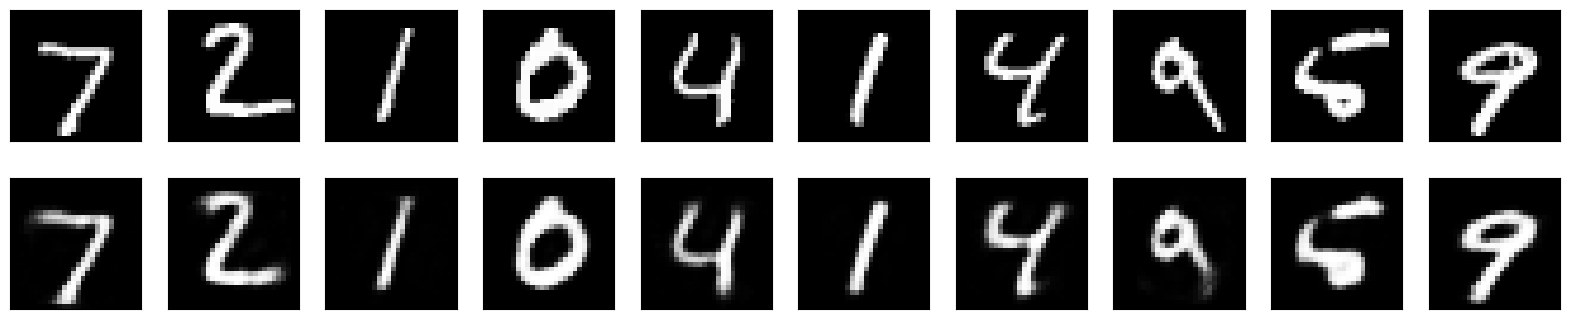

In [27]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of the encoded representation
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoding layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoding layers
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


In [30]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=12,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/12
59/59 [==============================] - 5s 60ms/step - loss: 0.2097 - val_loss: 0.1827
Epoch 2/12
59/59 [==============================] - 4s 62ms/step - loss: 0.1720 - val_loss: 0.1589
Epoch 3/12
59/59 [==============================] - 4s 65ms/step - loss: 0.1524 - val_loss: 0.1434
Epoch 4/12
59/59 [==============================] - 3s 55ms/step - loss: 0.1407 - val_loss: 0.1347
Epoch 5/12
59/59 [==============================] - 3s 47ms/step - loss: 0.1335 - val_loss: 0.1289
Epoch 6/12
59/59 [==============================] - 5s 92ms/step - loss: 0.1280 - val_loss: 0.1238
Epoch 7/12
59/59 [==============================] - 5s 89ms/step - loss: 0.1239 - val_loss: 0.1215
Epoch 8/12
59/59 [==============================] - 3s 47ms/step - loss: 0.1209 - val_loss: 0.1177
Epoch 9/12
59/59 [==============================] - 4s 60ms/step - loss: 0.1180 - val_loss: 0.1149
Epoch 10/12
59/59 [==============================] - 4s 68ms/step - loss: 0.1156 - val_loss: 0.1133
Epoch 11/

In [31]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


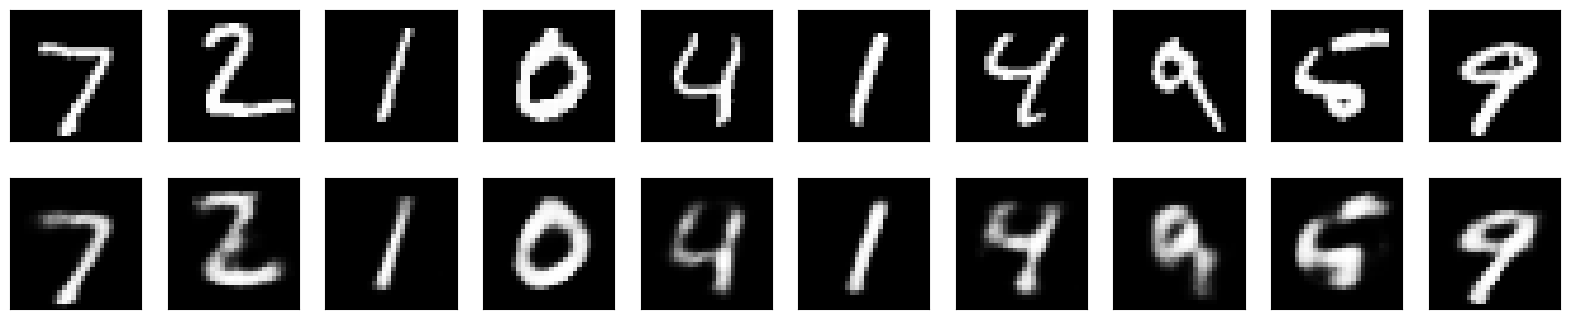

In [32]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()